In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

from scipy.stats import zscore
from dotenv import load_dotenv

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA


from sqlalchemy import create_engine

In [50]:
from sqlalchemy import Column, Float, Integer, String, MetaData, Table

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
from sklearn.metrics.pairwise import euclidean_distances

In [9]:
load_dotenv()

user = os.getenv('DB_USER')
password = os.getenv('DB_PASSWORD')
host = os.getenv('DB_HOST')
port = os.getenv('DB_PORT')
database = os.getenv('DB_NAME')

connection_str = f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}'
engine = create_engine(connection_str)
sql_query = 'SELECT * FROM xdr_data'
df = pd.read_sql(sql_query, con= engine)
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [6]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [23]:
df['Handset Type'].fillna(df['Handset Type'].mode().iloc[0], inplace=True)

# Handle missing values in other columns
df['Avg RTT DL (ms)'].fillna(df['Avg RTT DL (ms)'].mean(), inplace=True)
df['Avg RTT UL (ms)'].fillna(df['Avg RTT UL (ms)'].mean(), inplace=True)
df['Avg Bearer TP DL (kbps)'].fillna(df['Avg Bearer TP DL (kbps)'].mean(), inplace=True)
df['Avg Bearer TP UL (kbps)'].fillna(df['Avg Bearer TP UL (kbps)'].mean(), inplace=True)
df['TCP DL Retrans. Vol (Bytes)'].fillna(df['Avg Bearer TP UL (kbps)'].mean(), inplace=True)
df['TCP UL Retrans. Vol (Bytes)'].fillna(df['Avg Bearer TP UL (kbps)'].mean(), inplace=True)

# Handle outliers using z-score
numeric_columns = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']

# Calculate z-scores for numeric columns
z_scores = zscore(df[numeric_columns])

# Define a threshold for outliers (e.g., 3)
outlier_threshold = 3

# Replace outliers with mean
df[numeric_columns] = np.where((np.abs(z_scores) > outlier_threshold), df[numeric_columns].mean(), df[numeric_columns])

# Aggregate per customer
customer_aggregation = {
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Handset Type': lambda x: x.mode().iloc[0],
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean'
}

customer_data = df.groupby('MSISDN/Number').agg(customer_aggregation).reset_index()
customer_data

,MSISDN/Number,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,3.360100e+10,7.985027e+02,798.502670,46.000000,0.000000,Huawei P20 Lite Huawei Nova 3E,37.0,39.000000
1,3.360100e+10,7.985027e+02,798.502670,30.000000,1.000000,Apple iPhone 7 (A1778),48.0,51.000000
2,3.360100e+10,7.985027e+02,798.502670,109.795706,17.662883,undefined,48.0,49.000000
3,3.360101e+10,1.066000e+03,798.502670,69.000000,15.000000,Apple iPhone 5S (A1457),204.0,44.000000
4,3.360101e+10,4.675214e+06,11000.251335,57.000000,2.500000,Apple iPhone Se (A1723),20197.5,905.214323
...,...,...,...,...,...,...,...,...
106851,3.379000e+10,2.150440e+05,3001.000000,42.000000,10.000000,Huawei Honor 9 Lite,9978.0,387.000000
106852,3.379000e+10,7.985027e+02,798.502670,34.000000,6.000000,Apple iPhone 8 Plus (A1897),68.0,48.000000
106853,3.197021e+12,7.985027e+02,798.502670,109.795706,17.662883,Quectel Wireless. Quectel Ec25-E,1.0,0.000000
106854,3.370000e+14,7.985027e+02,798.502670,109.795706,17.662883,Huawei B525S-23A,11.0,22.000000


In [25]:
def compute_values(column_name, top_n=10):
    top_values = df[column_name].nlargest(top_n).tolist()
    bottom_values = df[column_name].nsmallest(top_n).tolist()
    most_frequent_values = df[column_name].value_counts().nlargest(top_n).index.tolist()

    return top_values, bottom_values, most_frequent_values

# Columns to analyze
columns_to_analyze = ["TCP DL Retrans. Vol (Bytes)", "TCP UL Retrans. Vol (Bytes)" , "Avg RTT DL (ms)", "Avg RTT UL (ms)", "Avg Bearer TP DL (kbps)", "Avg Bearer TP UL (kbps)"]

# Dictionary to store results
results_dict = {}

# Compute values for each column
for column in columns_to_analyze:
    top, bottom, frequent = compute_values(column)
    results_dict[column] = {"Top Values": top, "Bottom Values": bottom, "Most Frequent Values": frequent}

# Convert results to a DataFrame for easy visualization
results_df = pd.DataFrame(results_dict)
first_top_value = results_df.iloc[0]["TCP DL Retrans. Vol (Bytes)"]
print(first_top_value)
print(results_df)

[360892323.0, 359922548.0, 353206167.0, 351440959.0, 349102567.0, 348062089.0, 346323953.0, 345341458.0, 344820925.0, 343626906.0]
                                            TCP DL Retrans. Vol (Bytes)  \
Top Values            [360892323.0, 359922548.0, 353206167.0, 351440...   
Bottom Values         [2.0, 2.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...   
Most Frequent Values  [798.5026704960936, 8581727.001875944, 1330.0,...   

                                            TCP UL Retrans. Vol (Bytes)  \
Top Values            [47288459.0, 47206844.0, 46860504.0, 46814670....   
Bottom Values         [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
Most Frequent Values  [798.5026704960936, 1330.0, 2660.0, 1294.0, 39...   

                                                        Avg RTT DL (ms)  \
Top Values            [242.0, 242.0, 242.0, 242.0, 242.0, 242.0, 242...   
Bottom Values         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Most Frequent Values  [109.79570605376027,

In [27]:
customer_data['Avg Throughput'] = (
    customer_data['Avg Bearer TP DL (kbps)'] + customer_data['Avg Bearer TP UL (kbps)']
) / 2

# Distribution of Average Throughput per Handset Type
average_throughput_distribution = customer_data.groupby('Handset Type')['Avg Throughput'].mean()

# Print or visualize the distribution
print("Average Throughput Distribution per Handset Type:")
print(average_throughput_distribution)

Average Throughput Distribution per Handset Type:
Handset Type
A-Link Telecom I. Cubot A5                                                             11755.000000
A-Link Telecom I. Cubot Note Plus                                                       3349.500000
A-Link Telecom I. Cubot Note S                                                          4468.500000
A-Link Telecom I. Cubot Nova                                                           28108.500000
A-Link Telecom I. Cubot Power                                                           5828.659729
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809       29.000000
Zyxel Communicat. Lte7460                                                              20755.714323
Zyxel Communicat. Sbg3600                                                               6233.254943
Zyxel Communicat. Zyxel Wah7706      

In [28]:
customer_data['Avg TCP'] = (
    customer_data['TCP DL Retrans. Vol (Bytes)'] + customer_data['TCP UL Retrans. Vol (Bytes)']
) / 2

# Distribution of Average Throughput per Handset Type
average_tcp_transmission = customer_data.groupby('Handset Type')['Avg TCP'].mean()

# Print or visualize the distribution
print("Average TCP Retransmission  per Handset Type:")
print(average_tcp_transmission)

Average TCP Retransmission  per Handset Type:
Handset Type
A-Link Telecom I. Cubot A5                                                             7.985027e+02
A-Link Telecom I. Cubot Note Plus                                                      3.081065e+05
A-Link Telecom I. Cubot Note S                                                         2.070587e+07
A-Link Telecom I. Cubot Nova                                                           6.858500e+04
A-Link Telecom I. Cubot Power                                                          4.020500e+03
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809    1.263877e+03
Zyxel Communicat. Lte7460                                                              2.063827e+07
Zyxel Communicat. Sbg3600                                                              2.674347e+07
Zyxel Communicat. Zyxel Wah7706          

In [30]:
customer_data['Avg RTT'] = (
    customer_data['Avg RTT DL (ms)'] + customer_data['Avg RTT UL (ms)']
) / 2
customer_data

,MSISDN/Number,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Avg Throughput,Avg TCP,Avg RTT
0,3.360100e+10,7.985027e+02,798.502670,46.000000,0.000000,Huawei P20 Lite Huawei Nova 3E,37.0,39.000000,38.000000,7.985027e+02,23.000000
1,3.360100e+10,7.985027e+02,798.502670,30.000000,1.000000,Apple iPhone 7 (A1778),48.0,51.000000,49.500000,7.985027e+02,15.500000
2,3.360100e+10,7.985027e+02,798.502670,109.795706,17.662883,undefined,48.0,49.000000,48.500000,7.985027e+02,63.729294
3,3.360101e+10,1.066000e+03,798.502670,69.000000,15.000000,Apple iPhone 5S (A1457),204.0,44.000000,124.000000,9.322513e+02,42.000000
4,3.360101e+10,4.675214e+06,11000.251335,57.000000,2.500000,Apple iPhone Se (A1723),20197.5,905.214323,10551.357162,2.343107e+06,29.750000
...,...,...,...,...,...,...,...,...,...,...,...
106851,3.379000e+10,2.150440e+05,3001.000000,42.000000,10.000000,Huawei Honor 9 Lite,9978.0,387.000000,5182.500000,1.090225e+05,26.000000
106852,3.379000e+10,7.985027e+02,798.502670,34.000000,6.000000,Apple iPhone 8 Plus (A1897),68.0,48.000000,58.000000,7.985027e+02,20.000000
106853,3.197021e+12,7.985027e+02,798.502670,109.795706,17.662883,Quectel Wireless. Quectel Ec25-E,1.0,0.000000,0.500000,7.985027e+02,63.729294
106854,3.370000e+14,7.985027e+02,798.502670,109.795706,17.662883,Huawei B525S-23A,11.0,22.000000,16.500000,7.985027e+02,63.729294


In [32]:
experience_metrics = customer_data[['Avg TCP', 'Avg RTT', 'Avg Throughput']]

# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(experience_metrics)

# Analyze and describe each cluster
cluster_analysis = customer_data.groupby('Cluster').agg({
    'Avg TCP': ['mean', 'std'],
    'Avg RTT': ['mean', 'std'],
    'Avg Throughput': ['mean', 'std'],
    'MSISDN/Number': 'count'  # Count of users in each cluster
}).reset_index()

# Display the cluster analysis
print(cluster_analysis)

C:\Users\amanu\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


  Cluster       Avg TCP                  Avg RTT            Avg Throughput  \
                   mean           std       mean        std           mean   
0       0  5.352108e+05  1.722517e+06  38.202099  21.550989    4130.581239   
1       1  2.989383e+07  1.292568e+07  54.909877  21.382377   12974.637870   
2       2  1.030901e+08  3.124514e+07  56.587354  22.718942   13287.225016   

               MSISDN/Number  
           std         count  
0  6644.042606        104777  
1  8089.411995          1790  
2  8555.058672           289  


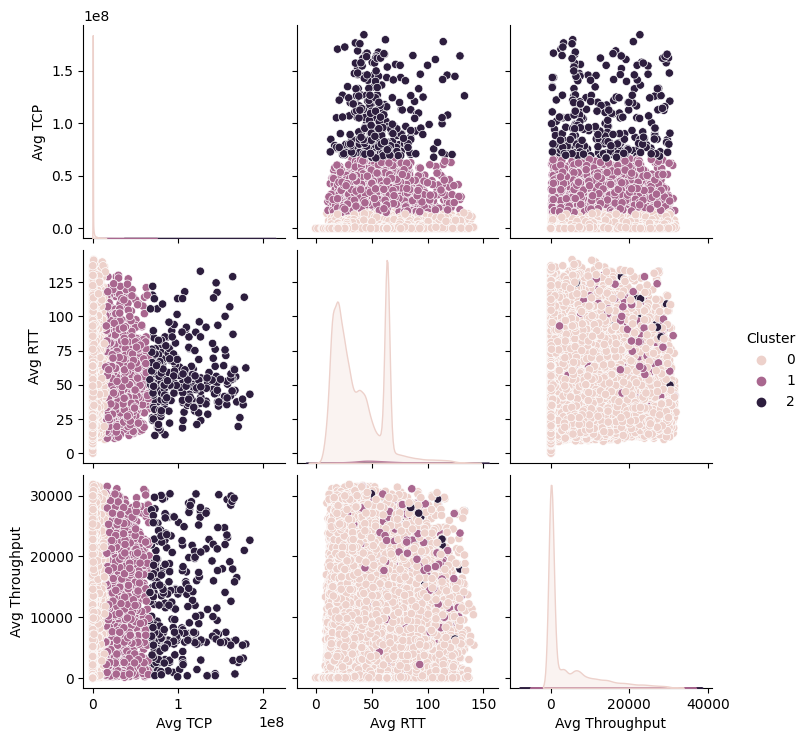

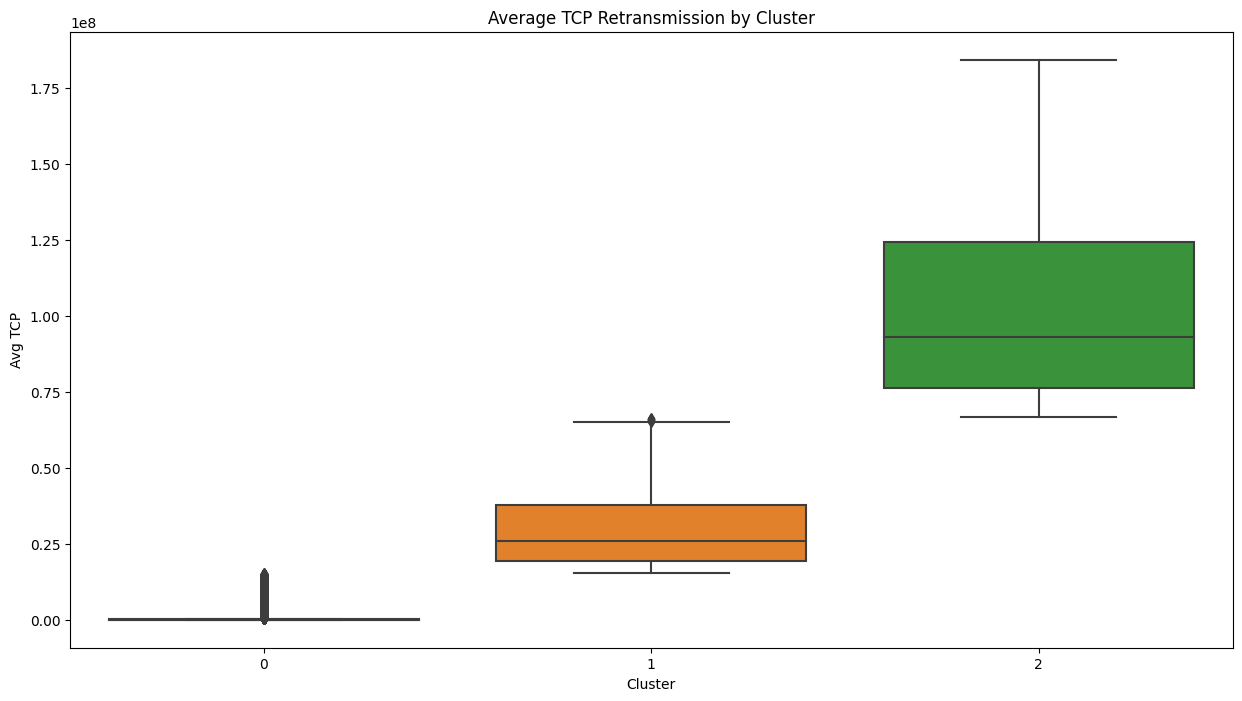

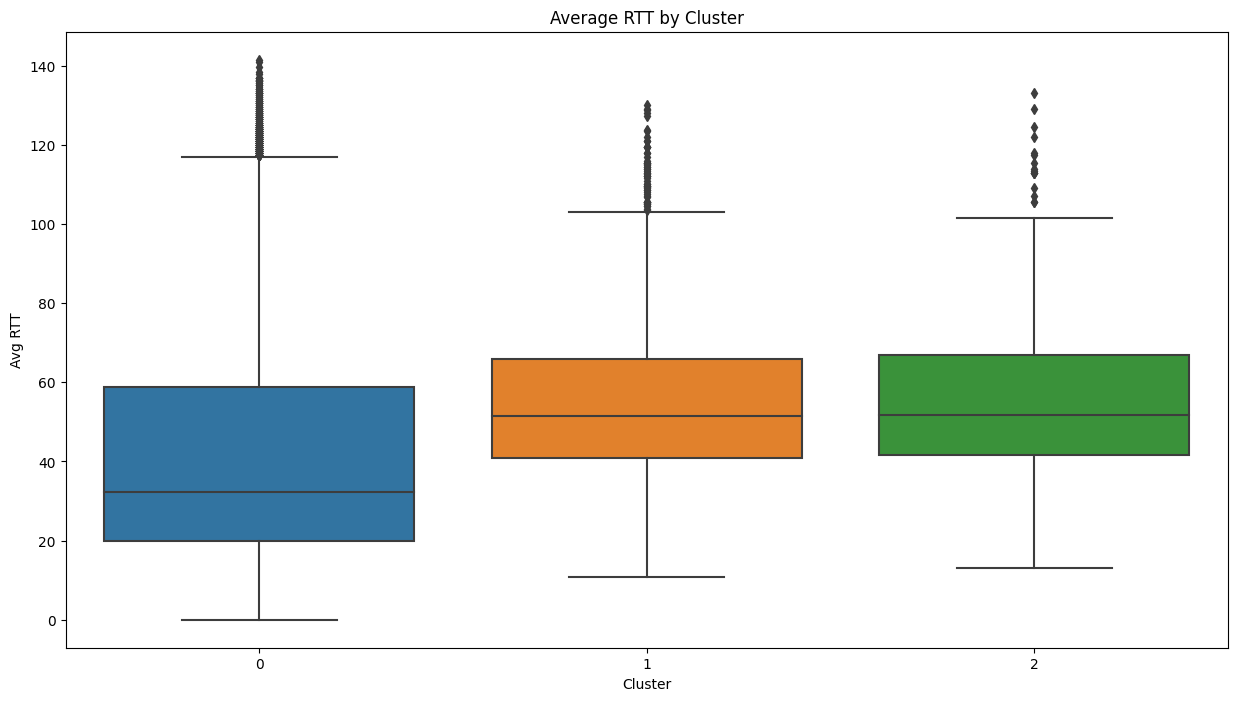

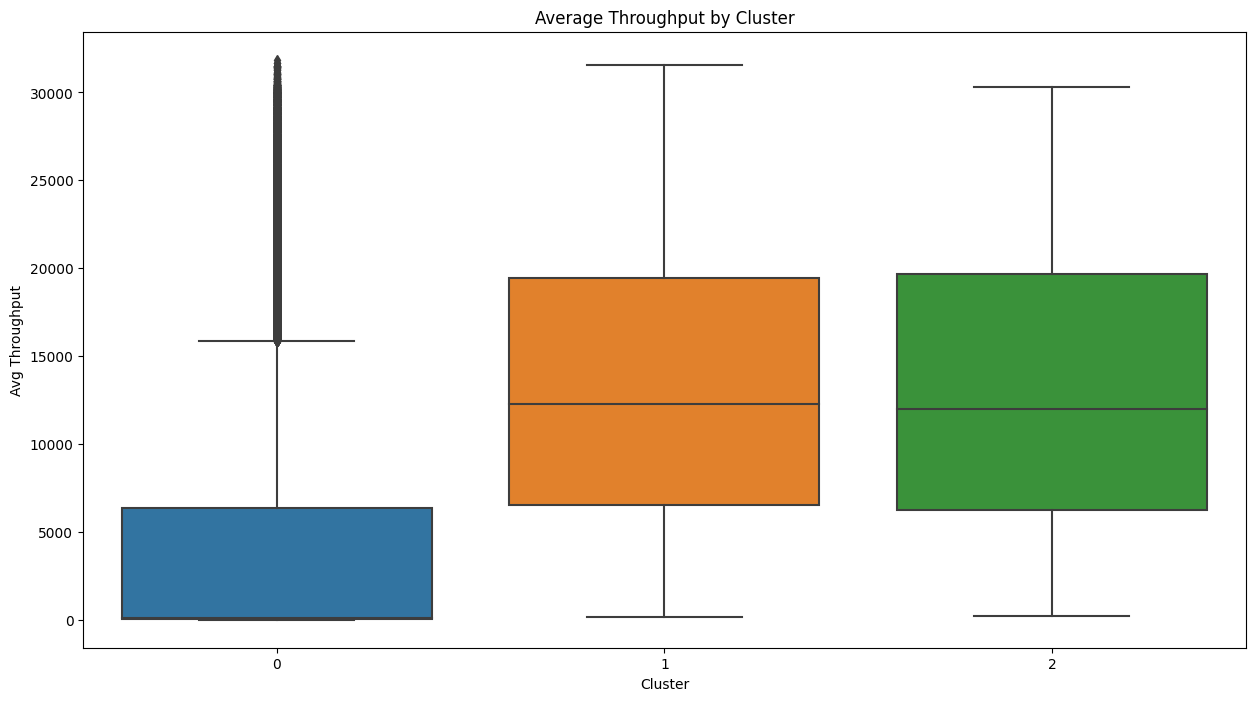

In [34]:
sns.pairplot(customer_data, hue='Cluster', vars=['Avg TCP', 'Avg RTT', 'Avg Throughput'])
plt.show()

# Plotting boxplots to visualize the distribution of each metric by cluster
plt.figure(figsize=(15, 8))
sns.boxplot(x='Cluster', y='Avg TCP', data=customer_data)
plt.title('Average TCP Retransmission by Cluster')
plt.show()

plt.figure(figsize=(15, 8))
sns.boxplot(x='Cluster', y='Avg RTT', data=customer_data)
plt.title('Average RTT by Cluster')
plt.show()

plt.figure(figsize=(15, 8))
sns.boxplot(x='Cluster', y='Avg Throughput', data=customer_data)
plt.title('Average Throughput by Cluster')
plt.show()

In [37]:
experience_columns = ["Avg RTT DL (ms)", "Avg RTT UL (ms)", "Avg Bearer TP DL (kbps)", "Avg Bearer TP UL (kbps)", "TCP DL Retrans. Vol (Bytes)", "TCP UL Retrans. Vol (Bytes)"]
kmeans = KMeans(n_clusters=3, random_state=42)
df['experience_cluster'] = kmeans.fit_predict(df[experience_columns])

# Task 5.1a - Assign engagement score using the first clustering
initial_clusters = df.groupby('experience_cluster')[experience_columns].mean()

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

df['engagement_score'] = df.apply(lambda row: euclidean_distance(row[experience_columns], initial_clusters.loc[row['experience_cluster']].values), axis=1)

# Task 5.1b - Assign experience score
worst_experience_cluster = df.groupby('experience_cluster')['engagement_score'].mean().idxmax()
worst_experience_cluster_centroid = df[df['experience_cluster'] == worst_experience_cluster][experience_columns].mean()

df['experience_score'] = df.apply(lambda row: euclidean_distance(row[experience_columns], worst_experience_cluster_centroid), axis=1)

# Print the final dataframe
print(df[['MSISDN/Number', 'experience_cluster', 'engagement_score', 'experience_score']])

C:\Users\amanu\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


        MSISDN/Number  experience_cluster  engagement_score  experience_score
0        3.366496e+10                   0      1.117725e+06      2.145939e+08
1        3.368185e+10                   0      1.117725e+06      2.145939e+08
2        3.376063e+10                   0      1.117725e+06      2.145939e+08
3        3.375034e+10                   0      1.117724e+06      2.145939e+08
4        3.369980e+10                   0      1.117725e+06      2.145939e+08
...               ...                 ...               ...               ...
149996   3.365069e+10                   0      1.117724e+06      2.145939e+08
149997   3.366345e+10                   0      1.117725e+06      2.145939e+08
149998   3.362189e+10                   0      1.117724e+06      2.145939e+08
149999   3.361962e+10                   0      1.117724e+06      2.145939e+08
150000            NaN                   0      1.117700e+06      2.145939e+08

[150001 rows x 4 columns]


In [38]:
df['satisfaction_score'] = (df['engagement_score'] + df['experience_score']) / 2

# Report the top 10 satisfied customers
top_satisfied_customers = df.nlargest(10, 'satisfaction_score')

# Print or further analyze the top satisfied customers
print(top_satisfied_customers[['MSISDN/Number', 'satisfaction_score']])

        MSISDN/Number  satisfaction_score
143056   3.376217e+10        1.463079e+08
59083    3.376376e+10        1.453385e+08
20069    3.366519e+10        1.386232e+08
67064    3.366815e+10        1.368563e+08
120640   3.366168e+10        1.345133e+08
87538    3.365849e+10        1.336144e+08
59790    3.366854e+10        1.317406e+08
122402   3.365011e+10        1.308836e+08
16492    3.366714e+10        1.307587e+08
3484     3.366259e+10        1.305270e+08


In [39]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),experience_cluster,engagement_score,experience_score,satisfaction_score
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0,0,1.117725e+06,2.145939e+08,1.078558e+08
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0,0,1.117725e+06,2.145939e+08,1.078558e+08
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0,0,1.117725e+06,2.145939e+08,1.078558e+08
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0,0,1.117724e+06,2.145939e+08,1.078558e+08
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0,0,1.117725e+06,2.145939e+08,1.078558e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0,0,1.117724e+06,2.145939e+08,1.078558e+08
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0,0,1.117725e+06,2.145939e+08,1.078558e+08
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0,0,1.117724e+06,2.145939e+08,1.078558e+08
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0,0,1.117724e+06,2.145939e+08,1.078558e+08


In [41]:
X = df[['engagement_score', 'experience_score']]

# Target (y)
y = df['satisfaction_score']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model performance metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 3.303502738885225e-15
R-squared (R2): 1.0


In [42]:
engagement_experience_scores = df[['engagement_score', 'experience_score']]

# Running k-means with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
df['satisfaction_cluster'] = kmeans.fit_predict(engagement_experience_scores)

# Display the resulting clusters
print(df['satisfaction_cluster'].value_counts())

C:\Users\amanu\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


satisfaction_cluster
0    148556
1      1445
Name: count, dtype: int64


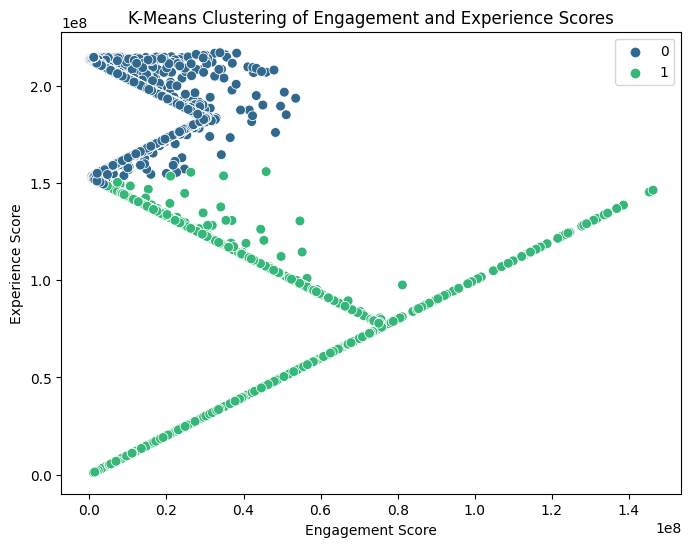

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='engagement_score', y='experience_score', hue='satisfaction_cluster', palette='viridis', s=50)
plt.title('K-Means Clustering of Engagement and Experience Scores')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.legend()
plt.show()

In [48]:
satisfaction_experience_agg = df.groupby('satisfaction_cluster')[['satisfaction_score', 'experience_score']].mean().reset_index()

# Print or display the aggregated results
print(satisfaction_experience_agg)

   satisfaction_cluster  satisfaction_score  experience_score
0                     0        1.074850e+08      2.129832e+08
1                     1        6.727023e+07      9.589657e+07


In [52]:
exported_df = df[['MSISDN/Number', 'engagement_score', 'experience_score', 'satisfaction_score']]
exported_df.dtypes

MSISDN/Number         float64
engagement_score      float64
experience_score      float64
satisfaction_score    float64
dtype: object

In [53]:
metadata = MetaData()

satisfaction_table = Table(
    'satisfaction_table',
    metadata,
    Column('MSISDN/Number', String, primary_key=True),
    Column('engagement_score', Float),
    Column('experience_score', Float),
    Column('satisfaction_score', Float)
)

# Create the table in the database
metadata.create_all(engine)

exported_df.to_sql('satisfaction_table', engine, if_exists='replace', index=False)

1